In [11]:
import warnings
warnings.filterwarnings('ignore')

### Import lib

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.constants as const
from scipy import integrate

In [13]:
# Physical constants
hbar = 1 #const.hbar
m = 1 #const.electron_mass

# Potentail well width
L = 10 # From x=0 to x=L

# Grid parameters
Nx = 1000
x = np.linspace(0, L, Nx)

# Time parameters
dt = 0.1
total_frames = 5000

In [14]:
# Energy states
def E(n):
    return (n**2 * np.pi**2 * hbar**2) / (2 * m * L**2)

# Wavefunction (x)
def wave_fn(n, x):
    return np.sqrt(2.0/L) * np.sin((n*np.pi*x) / L)

In [15]:
# List of states
states = [1, 2, 3, 4, 5]
n_states = len(states)

wave_list = [wave_fn(n, x) for n in states]
E_list = [E(n) for n in states]

C_list = [1.0]*n_states

In [16]:
def psi_t(t):
    current_psi = np.zeros_like(x, dtype=np.complex128)

    for i in range(n_states):
        Cn = C_list[i]
        wave_n = wave_list[i]
        En = E_list[i]

        current_psi += Cn * wave_n * np.exp(-1j * En * t / hbar)

    return current_psi

In [17]:
# Normalize the initial wave function
init_psi = psi_t(0)
prob_density = np.abs(init_psi)**2
integral = integrate.simpson(prob_density, x)
norm_factor = 1.0 / np.sqrt(integral)

# Apply the normalization factor to all coefficients
C_list = [c * norm_factor for c in C_list]

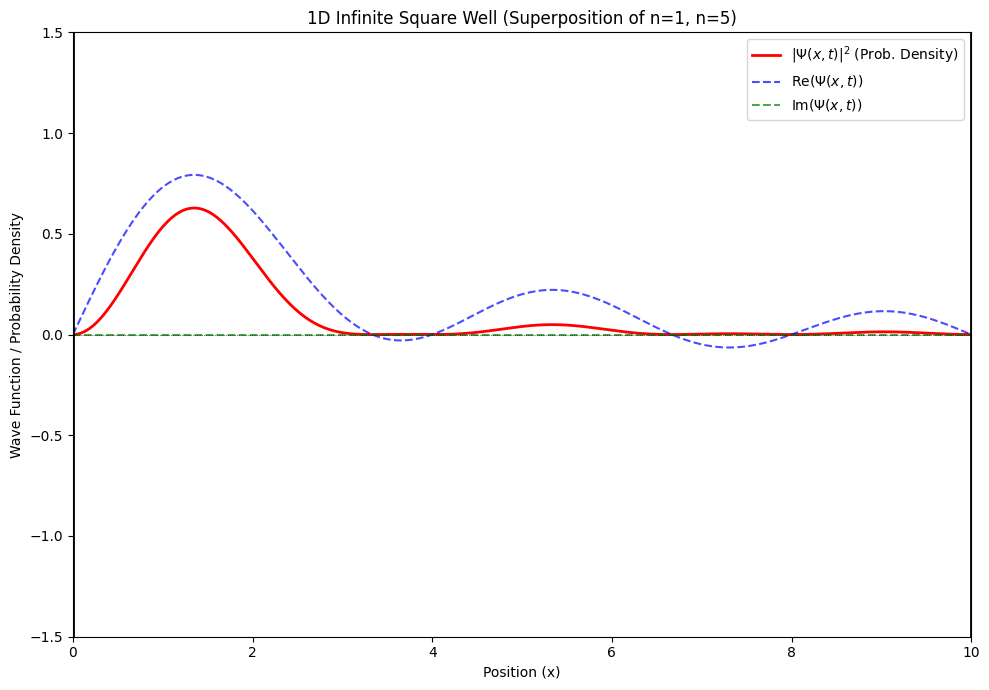

In [18]:
# Set up the animation
fig, ax = plt.subplots(figsize=(10, 7))

psi_0 = psi_t(0)

# Plot lines
(line_prob,) = ax.plot(
    x, np.abs(psi_0)**2, "r-", label="$|\Psi(x,t)|^2$ (Prob. Density)", lw=2
)
(line_real,) = ax.plot(
    x, np.real(psi_0), "b--", label="Re($\Psi(x,t)$)", alpha=0.7
)
(line_imag,) = ax.plot(
    x, np.imag(psi_0), "g--", label="Im($\Psi(x,t)$)", alpha=0.7
)
# Time
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, color='gray')

# Configuration
ax.set_xlim(0, L)
ax.set_ylim(-1.5, 1.5) # Adjusted for potentially higher amplitudes
ax.set_xlabel('Position (x)')
ax.set_ylabel('Wave Function / Probability Density')
ax.set_title(f'1D Infinite Square Well (Superposition of n=1, n={states[-1]})')
ax.legend(loc='upper right')
ax.axhline(0, color='black', lw=0.5, linestyle=':') # x-axis line
ax.axvline(0, color='black', lw=2) # Wall at x=0
ax.axvline(L, color='black', lw=2) # Wall at x=L

plt.tight_layout()

In [19]:
def update(frame):
    current_time = frame * dt

    # Get the wave function at the current time
    current_psi = psi_t(current_time)

    # Update the plot data
    line_prob.set_ydata(np.abs(current_psi)**2)
    line_real.set_ydata(np.real(current_psi))
    line_imag.set_ydata(np.imag(current_psi))
    time_text.set_text(f'Time = {current_time:.2f}')

    return line_prob, line_real, line_imag, time_text

In [20]:
# --- 5. Run the Animation ---

ani = FuncAnimation(
    fig,
    update,
    frames=total_frames,
    interval=30,  # Milliseconds per frame
    blit=True
)

ani.save('particle_in_the_box.mp4', writer='ffmpeg', fps=60, dpi=200)
plt.show()